# Wstęp do programowania zorientowanego obiektowo

Zamodelujemy dynamikę rozwoju populacji. 

Parametry
1. Prawdobieństwo zgonu
2. Prawdopodobieństwo rozmnożenia

In [1]:
import random
import matplotlib.pyplot as plt

In [36]:
class Creature:
    alive = True

    def __init__(self, p_death=0.1, p_reproduce=0.1):
        self.p_death = p_death
        self.p_reproduce = p_reproduce 
    
    def natural_selection(self):
        if random.random() < self.p_death: 
            self.alive = False
            
    def reproduce(self):
        if (random.random() < self.p_reproduce) and self.alive:
            return Creature(self.p_death + random.normalvariate(0, 0.01),
                            self.p_reproduce)

In [3]:
def count_alive(population):
    """Counts number of creatures in the population that are alive"""
    return len({creature for creature in population if creature.alive})

def make_population(n, p_death=0.1, p_reproduce=0.1):
    """Creates population"""
    return {Creature(p_death, p_reproduce) for _ in range(n)}

def natural_selection(population):
    """Applies natural selection process to the population"""
    {creature.natural_selection() for creature in population}

def reproduce(population):
    """Returns set of reproduced creatures for our population"""
    return {creature.reproduce() for creature in population} - {None}

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <BarContainer object of 10 artists>)

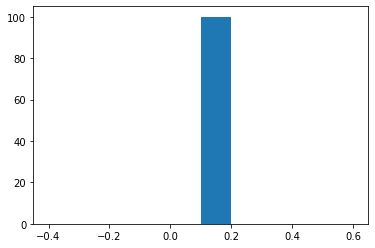

In [37]:
p_death = 0.1
p_reproduce = 0.1

population = make_population(100, p_death, p_reproduce)
plt.hist([creature.p_death for creature in population])

In [38]:
alive = [count_alive(population)]
for _ in range(100):
    new_creatures = reproduce(population)
    natural_selection(population)

    population = population | new_creatures

    
    alive.append(count_alive(population))

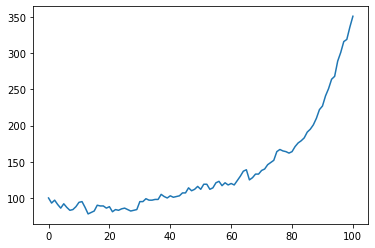

In [39]:
plt.plot(alive)

(array([ 3., 16., 42., 72., 67., 54., 40., 31., 16., 10.]),
 array([-0.00930062,  0.00395165,  0.01720392,  0.03045619,  0.04370846,
         0.05696074,  0.07021301,  0.08346528,  0.09671755,  0.10996982,
         0.12322209]),
 <BarContainer object of 10 artists>)

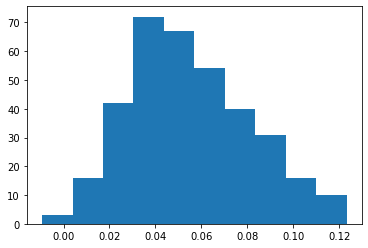

In [40]:
plt.hist([creature.p_death for creature in population if creature.alive])